In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
raw_df = pd.read_csv('../input/datasetfraud/PS_20174392719_1491204439457_log.csv')

In [31]:
raw_df.head(8)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.0,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.0,0,0


In [32]:
raw_df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1677795071,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [33]:
duplicated_df = raw_df[raw_df.duplicated(['nameOrig'], keep=False)]
duplicated_df.loc[duplicated_df['isFraud']==1].sort_values(by=['nameOrig'])

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6018798,453,CASH_OUT,2600970.32,C1015856166,2600970.32,0.0,C1424612838,2111795.89,4712766.22,1,0
5563738,388,CASH_OUT,20393.12,C1044518032,20393.12,0.0,C1479987881,293446.62,313839.74,1,0
3630051,274,TRANSFER,49210.21,C10982843,49210.21,0.0,C803239144,0.00,0.00,1,0
788647,39,TRANSFER,152042.16,C1118399210,152042.16,0.0,C104038589,0.00,0.00,1,0
6032849,475,CASH_OUT,876753.11,C1127304441,876753.11,0.0,C1403814902,0.00,876753.11,1,0
5980078,408,TRANSFER,2567602.10,C1191696703,2567602.10,0.0,C1815124854,0.00,0.00,1,0
2516796,205,TRANSFER,566156.42,C1498185758,566156.42,0.0,C1639518321,0.00,0.00,1,0
3610975,269,TRANSFER,676882.33,C1627918307,676882.33,0.0,C1636966593,0.00,0.00,1,0
1496506,142,TRANSFER,346374.54,C171834973,346374.54,0.0,C1249377837,0.00,0.00,1,0
6259529,601,CASH_OUT,1054244.29,C1851065642,1054244.29,0.0,C359107555,944153.97,1998398.26,1,0


In [34]:
raw_df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [36]:
trans_type_dict = {0 : 'CASH_IN', 1 : 'CASH_OUT', 2 : 'DEBIT', 3 : 'PAYMENT', 4 : 'TRANSFER'}
trans_type_list = ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']

df = raw_df.copy()
for i, trans_type in enumerate(trans_type_list):
    df.loc[df['type']== trans_type, 'type'] = i

In [37]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,3,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,3,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,3,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,3,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,2,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [40]:
drop_df = df.drop(['nameOrig', 'nameDest'], axis=1)
drop_df['type'] = drop_df['type'].astype(int)

In [41]:
df_describe = drop_df.describe()
df_describe

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.714150e+00,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,1.350117e+00,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,1.000000e+00,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,3.000000e+00,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,4.000000e+00,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [74]:
from sklearn.model_selection import train_test_split

train_X, test_X = train_test_split(drop_df, test_size=0.2, random_state=42)
train_y = train_X['isFraud']
test_y = test_X['isFraud']

train_X = train_X.drop('isFraud', axis=1)
test_X = test_X.drop('isFraud', axis=1)

In [75]:
train_y.shape

(5090096,)

In [76]:
train_describe = train_X.describe()
train_describe = train_describe.transpose()
train_describe

,count,mean,std,min,25%,50%,75%,max
step,5090096.0,2.433927e+02,1.423214e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
type,5090096.0,1.714075e+00,1.350068e+00,0.0,1.00,1.000,3.000000e+00,4.000000e+00
amount,5090096.0,1.797576e+05,6.016180e+05,0.0,13395.72,74865.015,2.086447e+05,9.244552e+07
oldbalanceOrg,5090096.0,8.333894e+05,2.886947e+06,0.0,0.00,14181.000,1.073060e+05,5.958504e+07
newbalanceOrig,5090096.0,8.545642e+05,2.922632e+06,0.0,0.00,0.000,1.441782e+05,4.958504e+07
oldbalanceDest,5090096.0,1.099593e+06,3.391912e+06,0.0,0.00,132690.365,9.417593e+05,3.560159e+08
newbalanceDest,5090096.0,1.223768e+06,3.666375e+06,0.0,0.00,214518.475,1.111015e+06,3.561793e+08
isFlaggedFraud,5090096.0,2.553979e-06,1.598116e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [77]:
for i, col in enumerate(train_X.columns):
    if col != 'type':
        train_X[col] = (train_X[col] - train_describe.loc[col, 'mean']) / train_describe.loc[col, 'std']
        test_X[col] = (test_X[col] - train_describe.loc[col, 'mean']) / train_describe.loc[col, 'std']

In [79]:
test_X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
3737323,0.243163,0,0.250094,-0.281447,-0.172269,-0.190799,-0.300451,-0.001598
264914,-1.604768,3,-0.279431,-0.278155,-0.285989,-0.324181,-0.333781,-0.001598
85647,-1.639900,0,-0.045699,-0.251754,-0.203827,-0.264833,-0.320406,-0.001598
5899326,1.121457,4,2.280522,-0.288675,-0.292395,0.618756,0.961809,-0.001598
2544263,-0.262735,0,-0.168854,0.723235,0.733907,-0.201589,-0.241688,-0.001598
...,...,...,...,...,...,...,...,...
2210524,-0.403262,3,-0.297264,-0.285348,-0.289423,-0.324181,-0.333781,-0.001598
956542,-1.401004,3,-0.297992,-0.287053,-0.290957,-0.324181,-0.333781,-0.001598
5474798,0.952825,1,0.114282,-0.288499,-0.292395,-0.317162,-0.259507,-0.001598
878120,-1.415056,1,0.033661,-0.288675,-0.292395,-0.150245,-0.118315,-0.001598


In [80]:
train_X.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
count,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06
mean,7.127149e-16,1.714075e+00,7.765867e-15,-7.867274e-15,3.056544e-15,-2.649236e-14,-1.480681e-14,-3.258296e-14
std,1.000000e+00,1.350068e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.703137e+00,0.000000e+00,-2.987903e-01,-2.886750e-01,-2.923954e-01,-3.241807e-01,-3.337815e-01,-1.598119e-03
25%,-6.140521e-01,1.000000e+00,-2.765242e-01,-2.886750e-01,-2.923954e-01,-3.241807e-01,-3.337815e-01,-1.598119e-03
50%,-3.086487e-02,1.000000e+00,-1.743509e-01,-2.837629e-01,-2.923954e-01,-2.850611e-01,-2.752718e-01,-1.598119e-03
75%,6.436650e-01,3.000000e+00,4.801567e-02,-2.515056e-01,-2.430638e-01,-4.653223e-02,-3.075324e-02,-1.598119e-03
max,3.510417e+00,4.000000e+00,1.533627e+02,2.035079e+01,1.667349e+01,1.046361e+02,9.681374e+01,6.257354e+02


In [65]:
train_y_df = pd.DataFrame(train_y)

fraud = len(train_y_df[train_y_df['isFraud']==1])
no_fraud = len(train_y_df[train_y_df['isFraud']==0])
print("The no. of fraud occurrences in the training data: ", fraud)
print("The fraction of fraud occurrences in the training data: ", fraud/len(train_y_df))

The no. of fraud occurrences in the training data:  6593
The fraction of fraud occurrences in the training data:  0.0012952604430250432


In [85]:
class_weight = {0 : fraud/len(train_y_df),
                1 : no_fraud/len(train_y_df)
               }
print("Weight of class 0: ", class_weight[0])
print("Weight of class 1: ", class_weight[1])

Weight of class 0:  0.0012952604430250432
Weight of class 1:  0.9987047395569749


In [90]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(class_weight=class_weight, max_iter=1000)
logisticRegr.fit(train_X, train_y)

LogisticRegression(class_weight={0: 0.0012952604430250432,
                                 1: 0.9987047395569749},
                   max_iter=1000)

In [91]:
from sklearn import metrics

y_pred = logisticRegr.predict(test_X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(test_X, test_y)))

Accuracy of logistic regression classifier on test set: 0.97


In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, y_pred)
print(confusion_matrix)

[[1232583   38321]
 [    303    1317]]


In [93]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1270904
           1       0.03      0.81      0.06      1620

    accuracy                           0.97   1272524
   macro avg       0.52      0.89      0.52   1272524
weighted avg       1.00      0.97      0.98   1272524



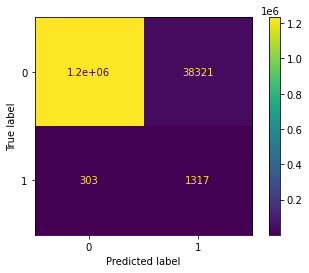

In [94]:
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logisticRegr, test_X, test_y)  
plt.show()

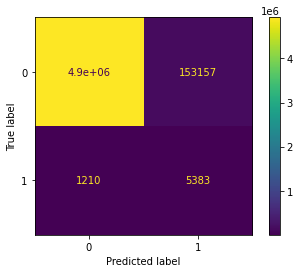

In [95]:
plot_confusion_matrix(logisticRegr, train_X, train_y)  
plt.show()

In [96]:
drop_df = df.drop(['nameOrig', 'nameDest', 'step'], axis=1)
drop_df['type'] = drop_df['type'].astype(int)

In [97]:
df_describe = drop_df.describe()
df_describe

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.714150e+00,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.350117e+00,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.000000e+00,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,4.000000e+00,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [98]:
train_X, test_X = train_test_split(drop_df, test_size=0.2, random_state=42)
train_y = train_X['isFraud']
test_y = test_X['isFraud']

train_X = train_X.drop('isFraud', axis=1)
test_X = test_X.drop('isFraud', axis=1)

In [99]:
train_describe = train_X.describe()
train_describe = train_describe.transpose()
train_describe

,count,mean,std,min,25%,50%,75%,max
type,5090096.0,1.714075e+00,1.350068e+00,0.0,1.00,1.000,3.000000e+00,4.000000e+00
amount,5090096.0,1.797576e+05,6.016180e+05,0.0,13395.72,74865.015,2.086447e+05,9.244552e+07
oldbalanceOrg,5090096.0,8.333894e+05,2.886947e+06,0.0,0.00,14181.000,1.073060e+05,5.958504e+07
newbalanceOrig,5090096.0,8.545642e+05,2.922632e+06,0.0,0.00,0.000,1.441782e+05,4.958504e+07
oldbalanceDest,5090096.0,1.099593e+06,3.391912e+06,0.0,0.00,132690.365,9.417593e+05,3.560159e+08
newbalanceDest,5090096.0,1.223768e+06,3.666375e+06,0.0,0.00,214518.475,1.111015e+06,3.561793e+08
isFlaggedFraud,5090096.0,2.553979e-06,1.598116e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [100]:
for i, col in enumerate(train_X.columns):
    if col != 'type':
        train_X[col] = (train_X[col] - train_describe.loc[col, 'mean']) / train_describe.loc[col, 'std']
        test_X[col] = (test_X[col] - train_describe.loc[col, 'mean']) / train_describe.loc[col, 'std']

In [101]:
logisticRegr = LogisticRegression(class_weight=class_weight, max_iter=100)
logisticRegr.fit(train_X, train_y)

LogisticRegression(class_weight={0: 0.0012952604430250432,
                                 1: 0.9987047395569749})

In [102]:
y_pred = logisticRegr.predict(test_X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(test_X, test_y)))

Accuracy of logistic regression classifier on test set: 0.99


In [104]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1270904
           1       0.06      0.77      0.12      1620

    accuracy                           0.99   1272524
   macro avg       0.53      0.88      0.56   1272524
weighted avg       1.00      0.99      0.99   1272524



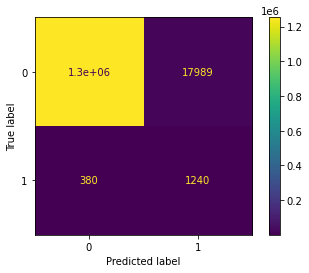

In [105]:
plot_confusion_matrix(logisticRegr, test_X, test_y)  
plt.show()

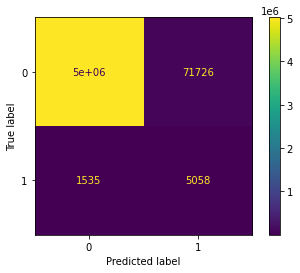

In [106]:
plot_confusion_matrix(logisticRegr, train_X, train_y)  
plt.show()